In [1]:
import requests
from rdkit import Chem
from rdkit.Chem import Draw
import re

In [2]:
def get_smiles_from_chebi(chebi_id):
    url = f"https://www.ebi.ac.uk/chebi/searchId.do?chebiId={chebi_id}"
    response = requests.get(url)
    if response.status_code == 200:
        html_content = response.text
        # Adjusted regular expression to match the provided HTML snippet
        match = re.search(r'<td class="chebiDataHeader".*?>SMILES</td>\s*<td>(.*?)</td>', html_content, re.DOTALL)
        if match:
            return match.group(1).strip()
    else:
        print("Error fetching the data")
        return None


def smiles_to_image(smiles, img_file='chemical_structure.png'):
    """Generate an image from a SMILES string."""
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        img = Draw.MolToImage(mol)
        img.save(img_file)
        return img
    else:
        print("Failed to generate image.")
        return None

[O-]C(=O)CCC([O-])=O


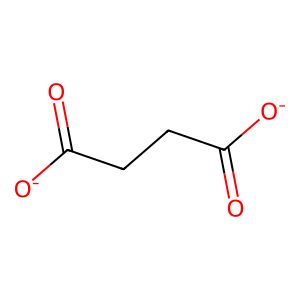

In [3]:
# Example Usage
chebi_id = 'CHEBI:30031'  # Replace 'your_chebi_id_here' with your ChEBI ID
smiles = get_smiles_from_chebi(chebi_id)
print(smiles)

if smiles:
    image = smiles_to_image(smiles)
    if image:
        # Display the image if you're using Jupyter notebooks or similar
        display(image)